ALWAYS SAVE WITH CTRL S

In [1]:
# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import string

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Topic Modeling: LSA
from gensim import corpora
from gensim.models import LsiModel


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Reading in the relevent data sets

project_2023 = pd.read_csv('/content/drive/MyDrive/f24_rga/RePORTER_PRJ_C_FY2023.csv')
abstract_2023 = pd.read_csv('/content/drive/MyDrive/f24_rga/RePORTER_PRJABS_C_FY2023.csv')

In [4]:
# Cleaning data by replacing unimportant and distracting characters
text = abstract_2023.iloc[0,1]
text.replace('\n', ' ').replace("\'", " ")
for i in string.punctuation:
    text = text.replace(i, ' ')


In [5]:
#Takes a random sample of one fourth of the rows to make the data more managable
sampled_abstract = abstract_2023.sample(frac=1/4)

In [6]:
#Imports another key library
import nltk
nltk.download('punkt_tab')

#Initialize the lemmatizer and the set of English stop words
lemmatizer = WordNetLemmatizer()
stop_words_set = set(stopwords.words('english'))

#Iterate over each row in the sampled_abstract DataFrame
for col, row in sampled_abstract.iterrows():
    # Cleaned Data
    text = row['ABSTRACT_TEXT']

#Check if the text is a string. Assigns an emptry string if not
    if not isinstance(text, str):
        text = ""

#Replaces newline characters and apostrophes with spaces
    text = text.replace('\n', ' ').replace("\'", " ")
#Removes punctuation from the text
    for i in string.punctuation:
        text = text.replace(i, ' ')

    # Converting words to root words
    words = word_tokenize(text)
    lemmatized_words = []
    for word in words:
        lemmatized_word = lemmatizer.lemmatize(word)
        lemmatized_words.append(lemmatized_word.lower())

    # Getting rid of stopwords
    filtered_words = [word for word in lemmatized_words if word not in stop_words_set]

#Join the filtered words back into a single string and assign it to the DataFrame
    sampled_abstract.at[col, 'cleaned_text'] = ' '.join(filtered_words)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [7]:


# Ensure 'TOTAL_COST' column is of type float and handle errors
project_2023['TOTAL_COST'] = pd.to_numeric(project_2023['TOTAL_COST'], errors='coerce')

# Fill missing values in 'TOTAL_COST' with 0 or other value
project_2023['TOTAL_COST'].fillna(0, inplace=True)

In [8]:
from nltk.tokenize import word_tokenize
#Tokenizes the text into words
words = word_tokenize(text)


In [9]:
#Convers the text to lowerase
text = text.lower()


In [10]:
from nltk.corpus import stopwords

#Get the set of English stop words
stopwords = set(stopwords.words('english'))

#Iterate through each word in the words list
for word in words:
#Checks if the current word is in the set of stop words
  if word in stopwords:
#If it is a stop word, remove it from the words list
    words.remove(word)



In [11]:
#Importing the pandas library as well as the matplotlib.plyplot and
#string module
import pandas as pd
import matplotlib.pyplot as plt
import string

In [12]:
#Initilize an empty dictionary to store word counts
word_counts = {}

#Iterate throgh each word in the list of words
for word in words:
#If the word is already in teh dictionary, increment its count
  if word in word_counts:
    word_counts[word] += 1
#If the word is not in the dictionary, initialize its count to 1
  else:
    word_counts[word] = 1



#Creates a list of the words from the word_counts dictionary
title_words = [key for key in word_counts.keys()]
#Creates a list of the counts from the word_counts dictionary
values_list = [value for value in word_counts.values()]


#Slice the title_words list to keep only the first 8 words
title_words = title_words[0: 8]
#Slice the values_list to keep only the counts corresponding to the first
#8 words
values_list = values_list[0:8]



In [13]:
#Initialize an empty list to store all words from the cleaned
#texts
all_words = []

#Iterate through each entry in the 'cleaned_text' colum of
#the DataFrame sampled_abstract
for text in  sampled_abstract['cleaned_text']:
#Check if the current entry is a string
  if isinstance(text, str):
#Split the text into words and extend the all_words list with these words
    all_words.extend(text.split())

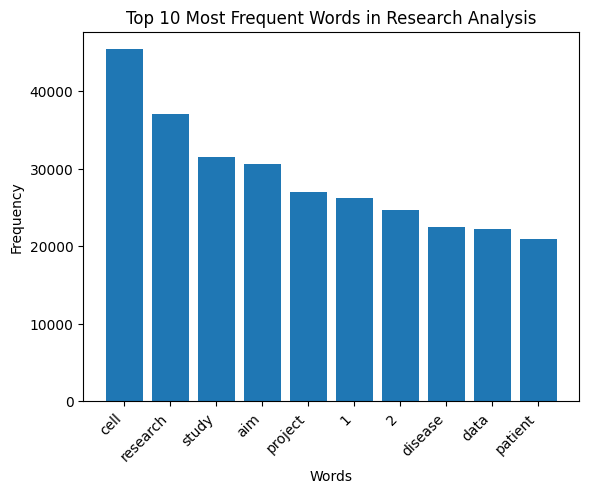

In [14]:
#Imports the Counter class
from collections import Counter

#Creates a Counter object to count occurrences of each
#word in all_words
word_counts = Counter(all_words)

#Get the 10 most common words and their counts
top_10_words = word_counts.most_common(10)

#Extract just the words from the top 10 tuples
words = [word for word, count in top_10_words]
#Exctract just the counts from the top 10 tuples
counts = [count for word, count in top_10_words]


#Plots the 10 most frequent words in reserach analysis against their counts
#and makes adjustmnets to make the graph readable
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Research Analysis')
plt.xticks(rotation=45, ha = 'right')
plt.show()


In [15]:
#Gets the cities the studies took place in and their cost while excluidng nan
prj_city = project_2023[project_2023["ORG_CITY"].notnull()]["ORG_CITY"]

#Gets the correlating costs for those cities
prj_cost = project_2023[project_2023["ORG_CITY"].notnull()]["TOTAL_COST"]

In [16]:
#Creates arrays to hold all the important costs and cities
all_costs = []
all_cities = []

#Iterates through prj_cost to get only the costs that aren't equal to 0
#(For formatting reasons within the data set there are some rows with costs that are equal to 0)
#During this, also getting the cities that fit those same indexes


#Puts the cities and costs in their own arrays
for city in prj_city:
  all_cities.append(city)
for cost in prj_cost:
  all_costs.append(cost)



In [17]:
#Uses the Counter library to get the occurences of each city in
#all_cities
city_counts = Counter(all_cities)

#Gets the 10 most common cities paired with their counts
most_common_cities = city_counts.most_common(10)

#Extracts only the counts into its own array
city_counts_array = [count for city, count in most_common_cities]

#Extracts only the city names into a new array
city_names_array = [city for city, count in most_common_cities]



In [18]:
#Creates a dictionary to store costs for each of the 10 most common cities
#Each key is a city from city_names_array, and each valye is an empty list
city_costs = {city: [] for city in city_names_array}

#Iterates through all of all_cities and all_costs to collect all the costs for
#the 10 most common cities. If "city" is one of the top 10 cities
#in city_costs, the code adds the cost to the list of costs associated with that city
for city, cost in zip(all_cities, all_costs):
  if city in city_costs:
    city_costs[city].append(cost)



In [19]:
#Creates a new dictionary to store average costs for each of the 10
#most common cities
average_city_costs = {}

#Calculates the average cost for each city
for city, costs in city_costs.items():
  #Makes sure there are costs to avoid divison by zero
  if costs:
    average_city_costs[city] = sum(costs) / len(costs)



In [20]:
#To organize the data, sort the average costs in descending order and get
#the sorted items
sorted_cities = sorted(average_city_costs.items(), key = lambda item: item[1], reverse = True)

#Creates seperate arrays for city names and their corresponding average costs
city_names_array = [city for city, _ in sorted_cities]
average_costs_array = [cost for _, cost in sorted_cities]



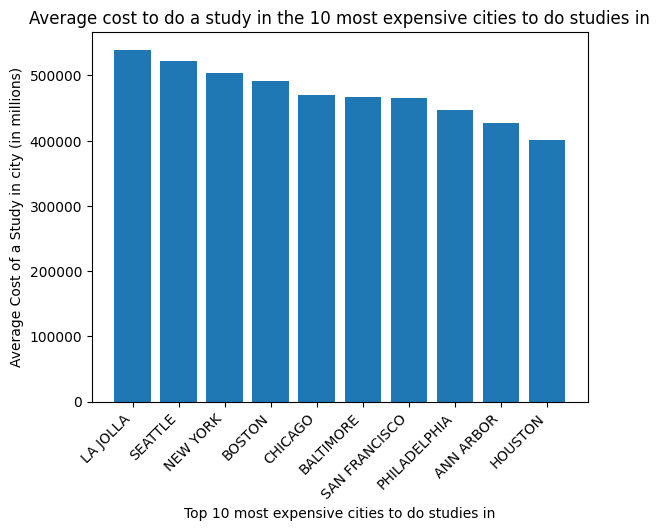

In [21]:
#Plots the average cost to do a study in the 10 most expensive cities to do studies in
#and makes adjustmnets to make the graph readable
plt.bar(city_names_array, average_costs_array)
plt.xlabel('Top 10 most expensive cities to do studies in')
plt.ylabel('Average Cost of a Study in city (in millions)')
plt.title('Average cost to do a study in the 10 most expensive cities to do studies in')
plt.xticks(rotation = 45,ha = 'right')
plt.show()

In [22]:
#Reading in the population data of U.S. Cities from the
#U.S. Census Burau

#Declaring the filepath to the file
file_path = '/content/drive/MyDrive/f24_rga/sub-est2023.csv'

#Read in the file with a different coding than standard
try:
  population_data = pd.read_csv(file_path, encoding='ISO-8859-1')
except UnicodeDecodeError:
  population_data = pd.read_csv(file_path, encoding='cp1252')


In [23]:
#Gets the FIPS codes of all the locations
population_FIPS_code = population_data["PLACE"]

#Gets the resident population estimate for that location
#in July of 2023
city_population = population_data["POPESTIMATE2023"]

#Gets in the name of the city
city_Name = population_data["NAME"]


In [24]:
#Isolates the index of each of the elements
FIPS_code_index = population_FIPS_code.index.tolist()
population_index = city_population.index.tolist()
name_index = city_Name.index.tolist()

In [25]:
#Spend the next 10 cells collecting the population data of each city

In [26]:
#La Jolla (San Diego)

#Gets the index of Seattle
la_jolla_index = city_Name[city_Name == "San Diego city"].index[0]

#Gets the population of Seattle based on that index
la_jolla_population = city_population[la_jolla_index]

print(la_jolla_population)

1388320


In [27]:
#Seattle

#Gets the index of Seattle
seattle_index = city_Name[city_Name == "Seattle city"].index[0]

#Gets the population of Seattle based on that index
seattle_population = city_population[seattle_index]

print(seattle_population)

755078


In [28]:
#New York

#Gets the index of New York City
NYC_index = city_Name[city_Name == "New York city"].index[0]

#Gets the population of Seattle based on that index
NYC_population = city_population[NYC_index]

print(NYC_population)

8258035


In [29]:
#Boston

#Gets the index of Boston
boston_index = city_Name[city_Name == "Boston city"].index[2]

#Gets the population of Seattle based on that index
boston_population = city_population[boston_index]

print(boston_population)

653833


In [30]:
#Chicago

#Gets the index of Chicago
chicago_index = city_Name[city_Name == "Chicago city"].index[0]

#Gets the population of Seattle based on that index
chicago_population = city_population[chicago_index]

print(chicago_population)

2664452


In [31]:
#Baltimore

#Gets the index of Baltimore
baltimore_index = city_Name[city_Name == "Baltimore city"].index[0]

#Gets the population of Seattle based on that index
baltimore_population = city_population[baltimore_index]

print(baltimore_population)

565239


In [32]:
#San Fransisco

#Gets the index of San Fransisco
SF_index = city_Name[city_Name == "San Francisco city"].index[0]

#Gets the population of Seattle based on that index
SF_population = city_population[SF_index]

print(SF_population)

808988


In [33]:
#Philadelphia

#Gets the index of Philadelphia
philly_index = city_Name[city_Name == "Philadelphia city"].index[3]

#Gets the population of Seattle based on that index
philly_population = city_population[philly_index]

print(philly_population)

1550542


In [34]:
#Ann Arbor

#Gets the index of Ann Arbor
ann_arbor_index = city_Name[city_Name == "Ann Arbor city"].index[0]

#Gets the population of Seattle based on that index
ann_arbor_population = city_population[ann_arbor_index]

print(ann_arbor_population)

119381


In [35]:
#Houston

#Gets the index of Ann Arbor
houston_index = city_Name[city_Name == "Houston city"].index[11]

#Gets the population of Seattle based on that index
houston_population = city_population[houston_index]

print(houston_population)

2314157


In [36]:
#Creates an array to store the population data inside of
population_array = []

#Adds the population data in order
population_array.extend([la_jolla_population, seattle_population, NYC_population, boston_population, chicago_population])
population_array.extend([baltimore_population, SF_population, philly_population, ann_arbor_population, houston_population])


In [37]:
#Ensure population_array and average_costs_array are numpy arrays
#(Needed for the line of best fit calculations)
population_array = np.array(population_array)
average_costs_array = np.array(average_costs_array)



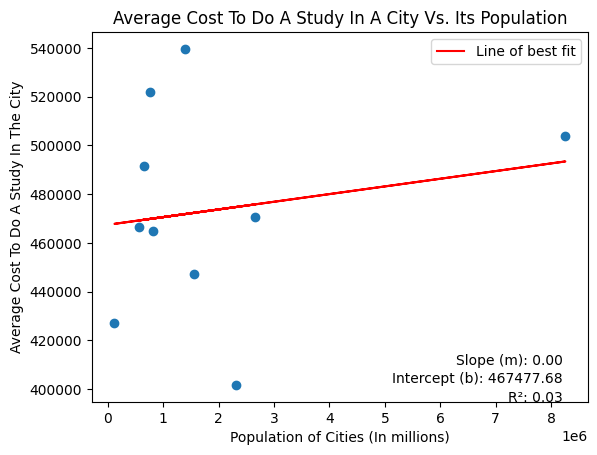

In [38]:
#Plotting the city population vs the average cost to do a study in a city
#and make adjustments to make the graph readable
plt.scatter(population_array, average_costs_array)

#Calculate the line of best fit (m being slope and b being the y-intercept)
m, b = np.polyfit(population_array, average_costs_array, 1)
best_fit_line = m * population_array + b

#Plot the line of best fit
plt.plot(population_array, best_fit_line, color = "red", label = "Line of best fit")

# Calculate R^2 value
ss_total = np.sum((average_costs_array - np.mean(average_costs_array)) ** 2)
ss_residual = np.sum((average_costs_array - best_fit_line) ** 2)
r_squared = 1 - (ss_residual / ss_total)

#Annotate slope, intercept, and R^2 on the graph
plt.text(0.95, 0.1, f"Slope (m): {m:.2f}", transform=plt.gca().transAxes, fontsize=10, ha='right')
plt.text(0.95, 0.05, f"Intercept (b): {b:.2f}", transform=plt.gca().transAxes, fontsize=10, ha='right')
plt.text(0.95, 0.0, f"R²: {r_squared:.2f}", transform=plt.gca().transAxes, fontsize=10, ha='right')


#Make more adjustments to graph
plt.xlabel("Population of Cities (In millions)")
plt.ylabel("Average Cost To Do A Study In The City")
plt.title("Average Cost To Do A Study In A City Vs. Its Population")
plt.legend()

#Displays the plot
plt.show()

In [39]:
#Due to New Yorks extremely high population (compared to the other cities)
#it acts as an outlier to the rest of the data

print(population_array)

#Removes the NYC element from both the population_array and the average_costs_array
new_population_array = np.delete(population_array, 2)
new_average_costs_array = np.delete(average_costs_array, 2)

print(new_population_array)


[1388320  755078 8258035  653833 2664452  565239  808988 1550542  119381
 2314157]
[1388320  755078  653833 2664452  565239  808988 1550542  119381 2314157]


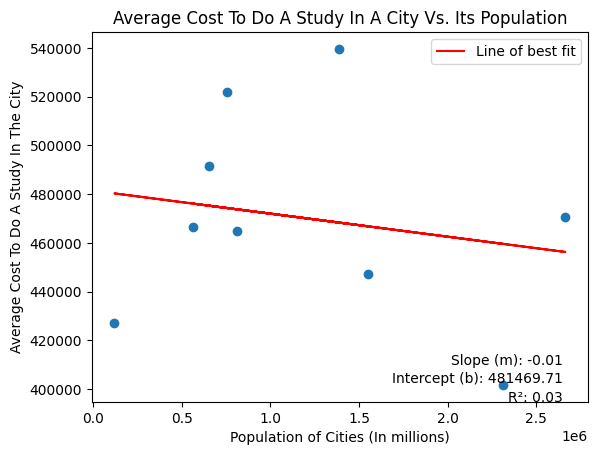

In [40]:
#Now do the same plotting and calcualtion process as before with updated arrays

#Plotting the city population vs the average cost to do a study in a city
#and make adjustments to make the graph readable
plt.scatter(new_population_array, new_average_costs_array)

#Calculate the line of best fit (m being slope and b being the y-intercept)
m, b = np.polyfit(new_population_array, new_average_costs_array, 1)
best_fit_line = m * new_population_array + b

#Plot the line of best fit
plt.plot(new_population_array, best_fit_line, color = "red", label = "Line of best fit")

# Calculate R^2 value
ss_total = np.sum((new_average_costs_array - np.mean(new_average_costs_array)) ** 2)
ss_residual = np.sum((new_average_costs_array - best_fit_line) ** 2)
r_squared = 1 - (ss_residual / ss_total)

#Annotate slope, intercept, and R^2 on the graph
plt.text(0.95, 0.1, f"Slope (m): {m:.2f}", transform=plt.gca().transAxes, fontsize=10, ha='right')
plt.text(0.95, 0.05, f"Intercept (b): {b:.2f}", transform=plt.gca().transAxes, fontsize=10, ha='right')
plt.text(0.95, 0.0, f"R²: {r_squared:.2f}", transform=plt.gca().transAxes, fontsize=10, ha='right')


#Make more adjustments to graph
plt.xlabel("Population of Cities (In millions)")
plt.ylabel("Average Cost To Do A Study In The City")
plt.title("Average Cost To Do A Study In A City Vs. Its Population")
plt.legend()

#Displays the plot
plt.show()

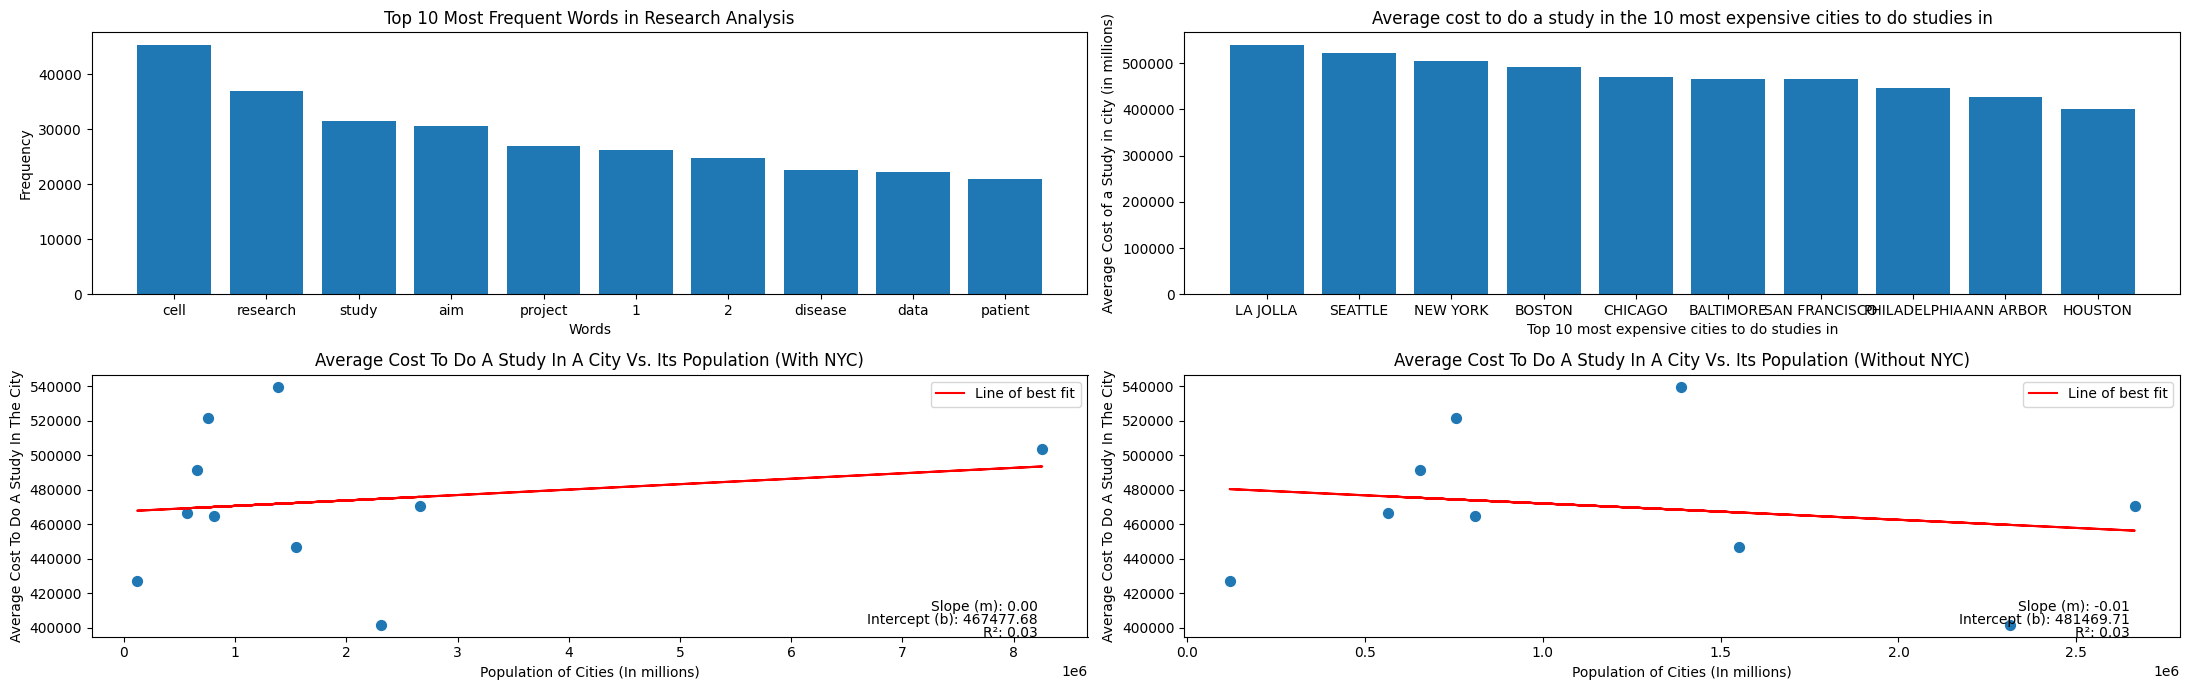

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Creating a figure and an array of subplots to fit the three figures
fig, axes = plt.subplots(2, 2, figsize=(22, 7))

# Plotting the average cost to do a study in the 10 most expensive cities
axes[0, 0].bar(words, counts)
axes[0, 0].set_xlabel('Words')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Top 10 Most Frequent Words in Research Analysis')

#Plots the average cost to do a study in the 10 most expensive cities to do studies in
#and makes adjustmnets to make the graph readable
axes[0, 1].bar(city_names_array, average_costs_array)
axes[0, 1].set_xlabel('Top 10 most expensive cities to do studies in')
axes[0, 1].set_ylabel('Average Cost of a Study in city (in millions)')
axes[0, 1].set_title('Average cost to do a study in the 10 most expensive cities to do studies in')

# Plotting the city population vs. the average cost to do a study in a city
# (With the included NYC outlier)
axes[1, 0].scatter(population_array, average_costs_array, s=50)

# Calculate the line of best fit for the first scatter plot
m1, b1 = np.polyfit(population_array, average_costs_array, 1)
best_fit_line1 = m1 * population_array + b1

# Plot the line of best fit
axes[1, 0].plot(population_array, best_fit_line1, color="red", label="Line of best fit")

# Calculate R^2 value
ss_total1 = np.sum((average_costs_array - np.mean(average_costs_array)) ** 2)
ss_residual1 = np.sum((average_costs_array - best_fit_line1) ** 2)
r_squared1 = 1 - (ss_residual1 / ss_total1)

# Annotate slope, intercept, and R^2 on the graph
axes[1, 0].text(0.95, 0.1, f"Slope (m): {m1:.2f}", transform=axes[1, 0].transAxes, fontsize=10, ha='right')
axes[1, 0].text(0.95, 0.05, f"Intercept (b): {b1:.2f}", transform=axes[1, 0].transAxes, fontsize=10, ha='right')
axes[1, 0].text(0.95, 0.0, f"R²: {r_squared1:.2f}", transform=axes[1, 0].transAxes, fontsize=10, ha='right')

# Styling for the second subplot
axes[1, 0].set_xlabel("Population of Cities (In millions)")
axes[1, 0].set_ylabel("Average Cost To Do A Study In The City")
axes[1, 0].set_title("Average Cost To Do A Study In A City Vs. Its Population (With NYC)")
axes[1, 0].legend()

# Plotting the city population vs. the average cost to do a study in a city
# (With NYC outlier excluded)
axes[1, 1].scatter(new_population_array, new_average_costs_array, s=50)

# Calculate the line of best fit for the second scatter plot
m2, b2 = np.polyfit(new_population_array, new_average_costs_array, 1)
best_fit_line2 = m2 * new_population_array + b2

# Plot the line of best fit
axes[1, 1].plot(new_population_array, best_fit_line2, color="red", label="Line of best fit")

# Calculate R^2 value
ss_total2 = np.sum((new_average_costs_array - np.mean(new_average_costs_array)) ** 2)
ss_residual2 = np.sum((new_average_costs_array - best_fit_line2) ** 2)
r_squared2 = 1 - (ss_residual2 / ss_total2)

# Annotate slope, intercept, and R^2 on the graph
axes[1, 1].text(0.95, 0.1, f"Slope (m): {m2:.2f}", transform=axes[1, 1].transAxes, fontsize=10, ha='right')
axes[1, 1].text(0.95, 0.05, f"Intercept (b): {b2:.2f}", transform=axes[1, 1].transAxes, fontsize=10, ha='right')
axes[1, 1].text(0.95, 0.0, f"R²: {r_squared2:.2f}", transform=axes[1, 1].transAxes, fontsize=10, ha='right')

# Styling for the third subplot
axes[1, 1].set_xlabel("Population of Cities (In millions)")
axes[1, 1].set_ylabel("Average Cost To Do A Study In The City")
axes[1, 1].set_title("Average Cost To Do A Study In A City Vs. Its Population (Without NYC)")
axes[1, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()